# Graph Based Clustering (Flat/Partitional)

Graph clustering is a technique that identifies groups (clusters or communities) of nodes in a graph that are more densely connected to each other than to the rest of the graph.

### Spectral Clustering (Most Common)

Uses eigenvalues of the graph Laplacian matrix to group nodes based on their connectivity.

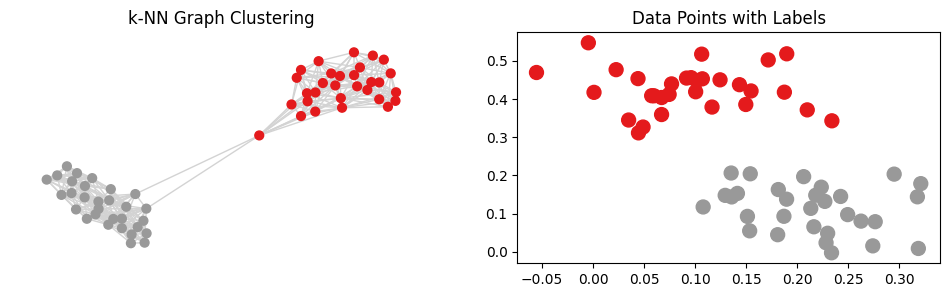

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.datasets import make_blobs
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering

# Generate synthetic data
X, _ = make_blobs(n_samples=60, centers=2, cluster_std=0.06, random_state=0, center_box=(-1.0, 1.0))

# Create k-NN graph
A = kneighbors_graph(X, 10).toarray()
A = 0.5 * (A + A.T)

# Perform spectral clustering
labels = SpectralClustering(2, affinity='precomputed').fit_predict(A)

# Create a graph from the adjacency matrix
G, pos = nx.from_numpy_array(A), nx.spring_layout(nx.from_numpy_array(A), seed=0)

# Plot the k-NN graph and the clustering results
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
nx.draw(G, pos, node_color=labels, node_size=40, edge_color='lightgray', cmap='Set1', ax=ax[0])
ax[0].set_title("k-NN Graph Clustering")
ax[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=100)
ax[1].set_title("Data Points with Labels")
plt.show()

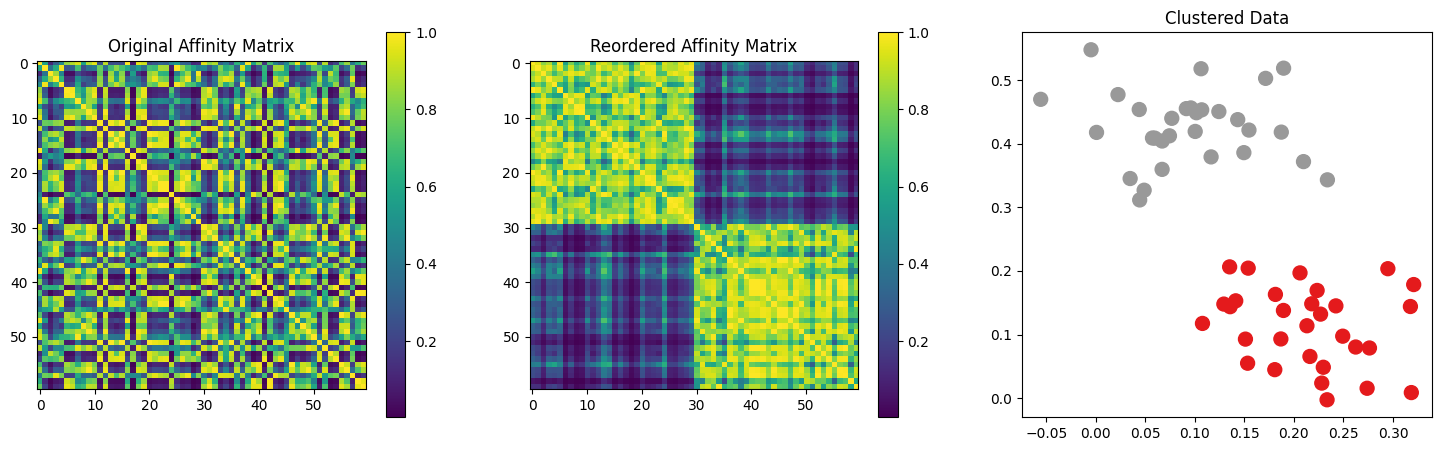

In [86]:
from sklearn.metrics.pairwise import rbf_kernel

# Generate synthetic data
X, _ = make_blobs(n_samples=60, centers=2, cluster_std=0.06, random_state=0, center_box=(-1,1))

# Compute the RBF kernel affinity matrix
aff = rbf_kernel(X, gamma=15)

# Perform spectral clustering on the RBF kernel affinity matrix
labels = SpectralClustering(2, affinity='precomputed').fit_predict(aff)

# Create a graph from the affinity matrix
order = np.argsort(labels)
aff_ord = aff[order][:, order]

# Plot the affinity matrix and the clustering results
fig, axs = plt.subplots(1,3, figsize=(18,5))
for ax, mat, title in zip(axs[:2], [aff, aff_ord], ['Original', 'Reordered']):
    im = ax.imshow(mat, cmap='viridis')
    ax.set_title(f"{title} Affinity Matrix")
    plt.colorbar(im, ax=ax)
axs[2].scatter(X[:,0], X[:,1], c=labels, cmap='Set1', s=100)
axs[2].set_title("Clustered Data")
plt.show()